In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('fuel-prices/AIP_TGP_Data_31-Jan-2020.csv', index_col='Date', parse_dates=True)
df.rename(columns={'National Average': 'national_avg_price'}, inplace=True)
df

Sydney  Melbourne  Brisbane  Adelaide  Perth  Darwin  Hobart  \
Date                                                                       
2004-01-01    86.3       85.1      86.4      87.2   88.5    89.7    87.9   
2004-01-02    86.3       85.1      86.4      87.2   88.5    89.7    87.9   
2004-01-05    86.4       85.3      86.4      87.2   89.0    89.7    87.9   
2004-01-06    86.8       85.6      87.0      87.7   89.1    90.3    88.5   
2004-01-07    86.7       85.5      87.0      87.7   89.1    90.3    88.5   
...            ...        ...       ...       ...    ...     ...     ...   
2020-01-27   130.8      130.1     130.3     130.4  129.4   134.3   135.6   
2020-01-28   130.7      130.1     130.2     130.4  129.4   134.2   135.5   
2020-01-29   129.7      129.1     129.3     129.4  128.5   133.3   134.3   
2020-01-30   128.7      128.1     128.3     128.4  127.5   132.3   133.2   
2020-01-31   127.7      127.2     127.4     127.5  126.6   131.5   132.4   

            national_avg_price  
Date                            
2004-01-01                86.4  
2004-01-02                86.4  
2004-01-05                86.5  
2004-01-06                86.9  
2004-01-07                86.8  
...                        ...  
2020-01-27               130.4  
2020-01-28               130.3  
2020-01-29               129.4  
2020-01-30               128.4  
2020-01-31               127.5  

[4197 rows x 8 columns]

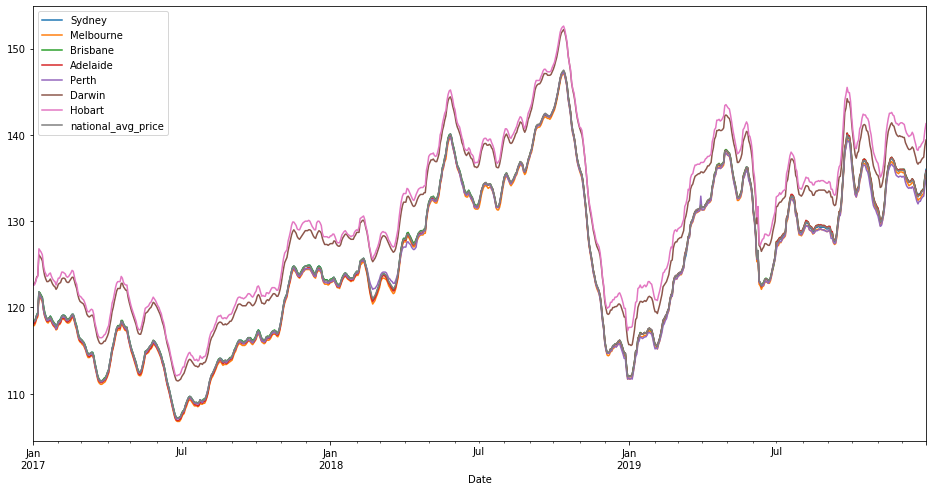

In [11]:
df = df.drop(df[(df.index < '2017-01-01') | (df.index >= '2020-01-01')].index)
df.plot(figsize=(16,8))

In [ ]:
df = df[['national_avg_price']]

In [4]:
number_of_days = 365 * 3
df

national_avg_price
Date                          
2017-01-02               118.4
2017-01-03               118.4
2017-01-04               118.6
2017-01-05               119.1
2017-01-06               119.3
...                        ...
2019-12-25               133.3
2019-12-26               133.5
2019-12-27               133.6
2019-12-30               134.9
2019-12-31               135.7

[782 rows x 1 columns]

In [5]:
dti = pd.date_range('2017-01-01', periods=number_of_days, freq='D')
df_full = pd.DataFrame([x for x in range(number_of_days)], dti, columns=['delme'])
df = df.merge(df_full, how='right' ,left_index=True, right_index=True, validate='one_to_one')
del df['delme']
df.national_avg_price.fillna(method='bfill', inplace=True)
df.national_avg_price = df.national_avg_price.apply(lambda x: x * 10).astype('int')
df

national_avg_price
2017-01-01                1184
2017-01-02                1184
2017-01-03                1184
2017-01-04                1186
2017-01-05                1191
...                        ...
2019-12-27                1336
2019-12-28                1349
2019-12-29                1349
2019-12-30                1349
2019-12-31                1357

[1095 rows x 1 columns]

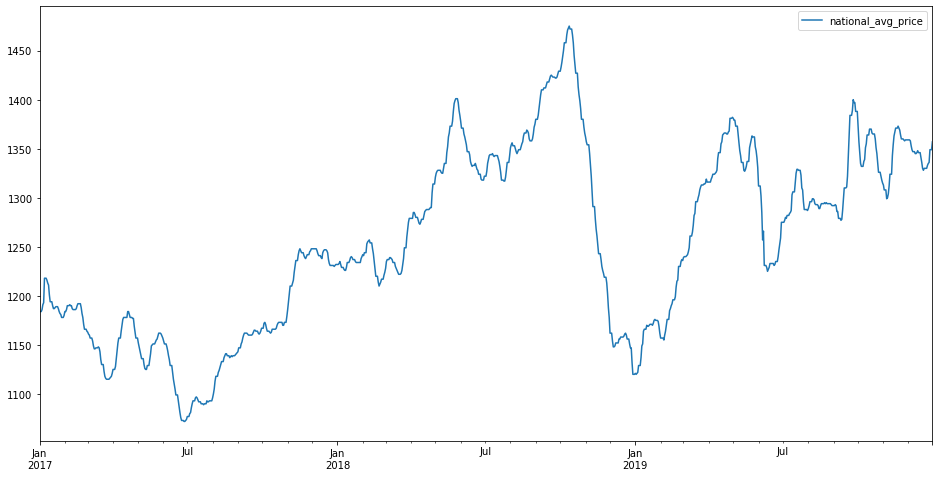

In [6]:
df.plot(figsize=(16,8))

In [7]:
df.to_csv('fuel-prices/aip-national_avg-2017-2019.csv',index_label='date', columns=['national_avg_price'])